Work by Torben Guijarro and Aleksandar Yordanov

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Laboratory #03 : Filters and Edges

At the end of this laboratory, you would get familiarized with

*   Convolution
*   Image Filters
*   Edge detection

## **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---

In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import color, data, exposure, feature, filters, io, morphology, util
from scipy.ndimage import convolve

# Convolution
Hint: 
*   *convolve function is available in scipy.ndimage module*
*   The mask has to be normalized before convolving with the image

### Exercise:
*   Read 'camera' image from the data module
*   Convolve the image with a horizontal mask:  (1 x 15) with all values set to ones


In [ ]:
# solution
camera = data.camera()

h_mask_15 = np.ones((1,15))/15
h_camera_15 = convolve(camera,h_mask_15)

*   Convolve the image with a vertical mask:  (15 x 1) with all values set to ones

In [ ]:
# solution
v_mask_15 = np.ones((15,1))/15
v_camera_15 = convolve(camera,v_mask_15)

*   Convolve the image with a 2D mask:  (15 x 15) with all values set to ones

In [ ]:
# solution
dd_mask_15 = np.ones((15,15))/(15*15)
dd_camera_15 = convolve(camera,dd_mask_15)


*   Visualize the original image, horizontal convolution, vertical convolution, 2D convolution using matplotlib subplot.

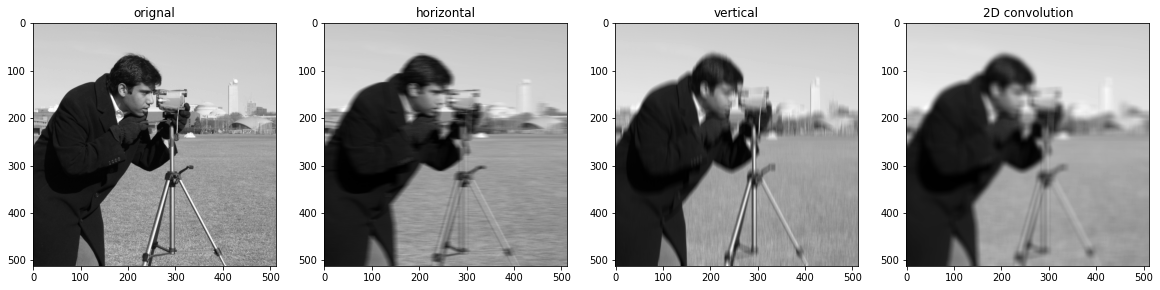

In [ ]:
# solution
fig, axs = plt.subplots(1,4, figsize=(20,5))
axs[0].imshow(camera,cmap=plt.cm.gray)
axs[1].imshow(h_camera_15,cmap=plt.cm.gray)
axs[2].imshow(v_camera_15,cmap=plt.cm.gray)
axs[3].imshow(dd_camera_15,cmap=plt.cm.gray)

axs[0].set_title("orignal")
axs[1].set_title("horizontal")
axs[2].set_title("vertical")
axs[3].set_title("2D convolution")
plt.show()


*   Apply 2 stage convolution: Horizontal mask (1 x 15) with all values set to 1 followed by vertical mask (15 x 1) with all values set to 1
*   Visualize the original image, 2D convolved image, 2 stage convolved image using matplotlib subplot.


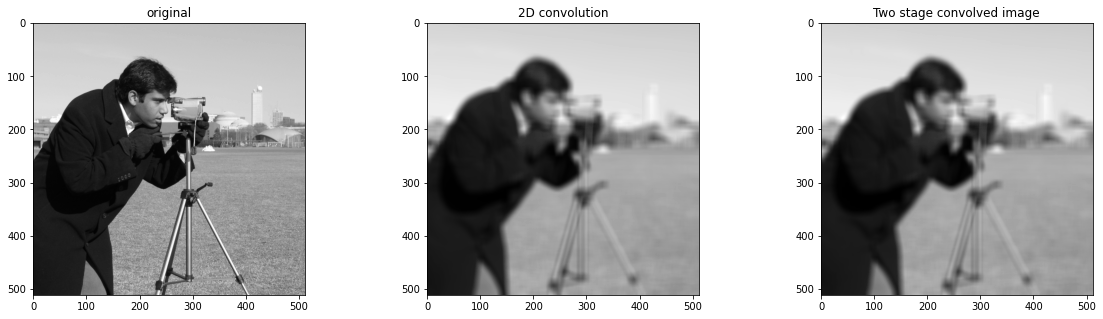

In [ ]:
# solution
two_stage_camera = convolve(h_camera_15,v_mask_15) 

fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(camera,cmap=plt.cm.gray)
axs[1].imshow(dd_camera_15,cmap=plt.cm.gray)
axs[2].imshow(two_stage_camera,cmap=plt.cm.gray)

axs[0].set_title("original")
axs[1].set_title("2D convolution")
axs[2].set_title("Two stage convolved image")

plt.show()

*   Is the result different from applying convolution with 2D mask (15 x 15) with all values set to 1?

**Solution**

No, the two stage convolved image appears the same as the convolution with a 2D mask. This is because they end up doing the same procedure. 

# Image Blurring

*   Why is blurring important?



**Solution**

Blurring can be used in multiple settings. It can be used in the general context of image analysis. For example to make all or part of an image blurry to increase the quality of the image, by reducing intensities that are not interesting to us.  

Furthermore, blurring will make the transition of one colour to another less suden. This feature can be useful when doing edges of an image, if we don't want to be affected by smaller edges and only focus on the bigger ones (more about it explained later in the coursework) [1].  

Blurring can also be used to "remove" undesirable small objects/parts of an image. 

### Exercise: Gaussian Filter
*   Read 'astronaut' image from the data module
*   Convert the image to grayscale.
*   Apply a gaussian filter with sigma=1
*   Hint: *gaussian function is available in skimage.filters module*

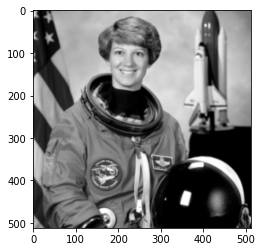

In [ ]:
# solution
from skimage.color import rgb2gray
from skimage.filters import gaussian

astronaut = data.astronaut()
gray_astronaut = rgb2gray(astronaut)

#plt.imshow(gray_astronaut, cmap=plt.cm.gray)
one_gaussian_astronaut = gaussian(gray_astronaut,sigma=1)
plt.imshow(one_gaussian_astronaut,cmap=plt.cm.gray)

*   Apply a gaussian filter with sigma=0. What is the result of this operation?

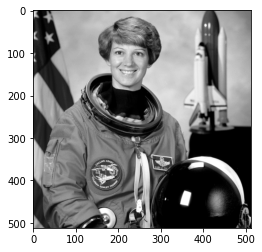

In [ ]:
# solution
zero_gaussian_astronaut = gaussian(gray_astronaut,sigma=0)
plt.imshow(zero_gaussian_astronaut,cmap=plt.cm.gray)


If sigma is equal to zero then no Gaussian filter is applied to the image. 

*   Vary the value of sigma in the gaussian filter. Apply sigma=0.25, 0.5, 1, 1.5, 2, 5
*   Visualize the different results using matplotlib subplot.

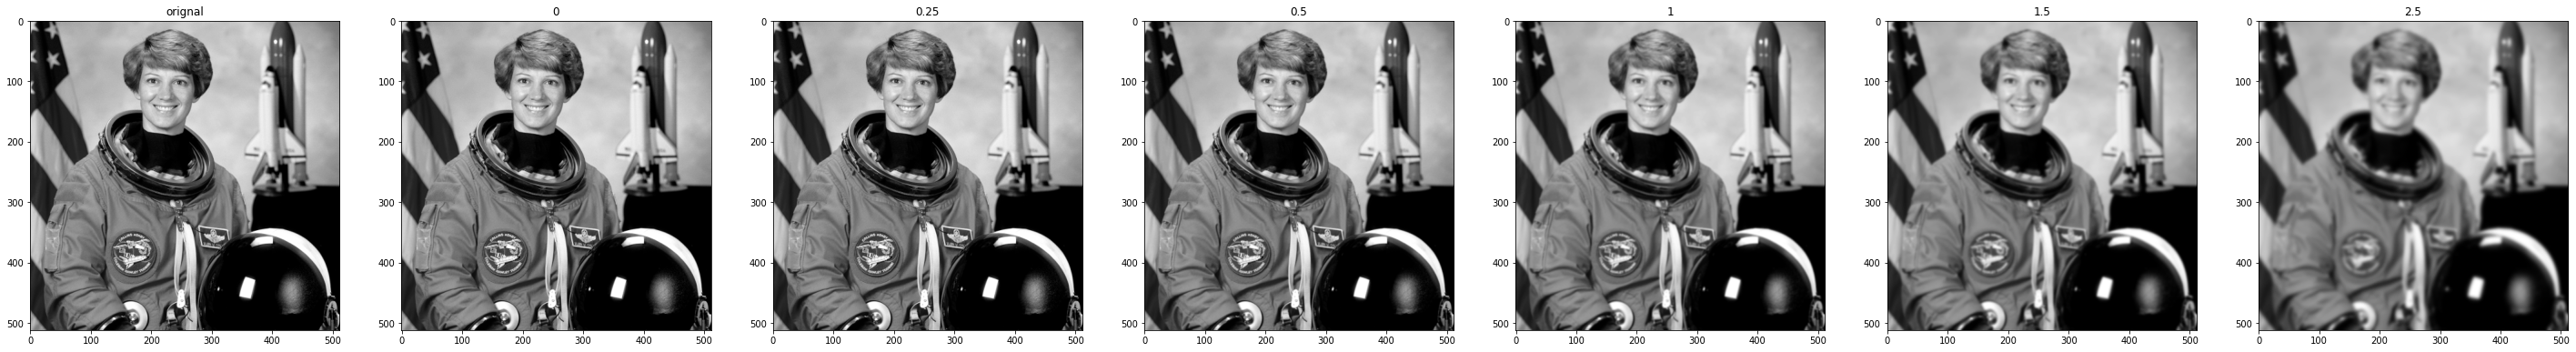

In [ ]:
# solution
#sigma[0.25, 0.5, 1, 1.5, 2, 5]
a_gaussian_astronaut = zero_gaussian_astronaut
b_gaussian_astronaut = gaussian(gray_astronaut,sigma=0.25)
c_gaussian_astronaut = gaussian(gray_astronaut,sigma=0.5)
d_gaussian_astronaut = one_gaussian_astronaut
e_gaussian_astronaut = gaussian(gray_astronaut,sigma=1.5)
f_gaussian_astronaut = gaussian(gray_astronaut,sigma=2.5)

fig, axs = plt.subplots(1,7, figsize=(50,7))
axs[0].imshow(gray_astronaut,cmap=plt.cm.gray)
axs[1].imshow(a_gaussian_astronaut,cmap=plt.cm.gray)
axs[2].imshow(b_gaussian_astronaut,cmap=plt.cm.gray)
axs[3].imshow(c_gaussian_astronaut,cmap=plt.cm.gray)
axs[4].imshow(d_gaussian_astronaut,cmap=plt.cm.gray)
axs[5].imshow(e_gaussian_astronaut,cmap=plt.cm.gray)
axs[6].imshow(f_gaussian_astronaut,cmap=plt.cm.gray)

axs[0].set_title("orignal")
axs[1].set_title("0")
axs[2].set_title("0.25")
axs[3].set_title("0.5")
axs[4].set_title("1")
axs[5].set_title("1.5")
axs[6].set_title("2.5")

plt.show()

*    What happens when a larger sigma value is used and what happens when a smaller sigma value is used in the gaussian filter?
*    What determines the optimal sigma value?




**Solution**

The larger the sigma value used, the greater the blurring. The sigma determines the width of the Gaussian kernel. This is also known in statistics as the standard deviation or the variance (when it is squared) for a Gaussian probability density function [2].



The optimal value of sigma will depend on the image used. The kernel/mask size should be proportional to the sigma value. The larger the variance (sigma) the more the high intensities will be blurred. 

### Exercise: Median Filter
*   Convert the 'astronauts' image to grayscale
*   Apply median filter with a disk structuring element of radius 1, 5, 10
*   Visualize the original image and the filtered image matplotlib subplot.

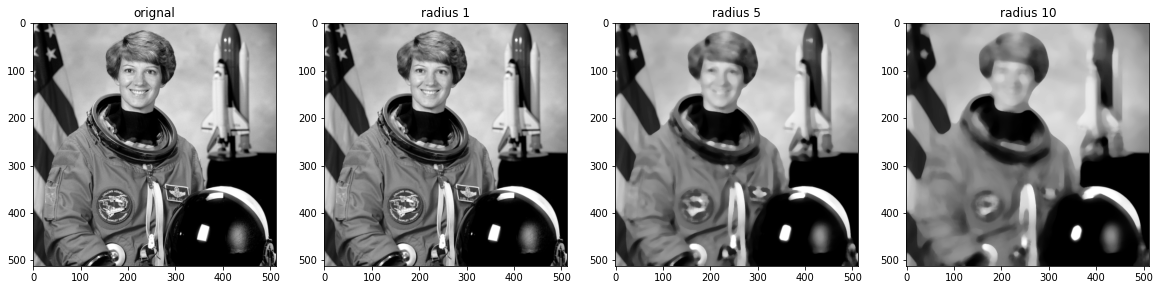

In [ ]:
# solution
from scipy.ndimage import median_filter
#gray_astronaut

r1 = morphology.disk(1)
r5 = morphology.disk(5)
r10 = morphology.disk(10)

median_astronaut_r1 = median_filter(gray_astronaut,footprint=r1)
median_astronaut_r5 = median_filter(gray_astronaut,footprint=r5)
median_astronaut_r10 = median_filter(gray_astronaut,footprint=r10)

fig, axs = plt.subplots(1,4, figsize=(20,5))
axs[0].imshow(gray_astronaut,cmap=plt.cm.gray)
axs[1].imshow(median_astronaut_r1,cmap=plt.cm.gray)
axs[2].imshow(median_astronaut_r5,cmap=plt.cm.gray)
axs[3].imshow(median_astronaut_r10,cmap=plt.cm.gray)


axs[0].set_title("orignal")
axs[1].set_title("radius 1")
axs[2].set_title("radius 5")
axs[3].set_title("radius 10")

plt.show()


*   Change the structuring element to square, rectangle and diamond
*   Visualize the original image and the filtered image using matplotlib

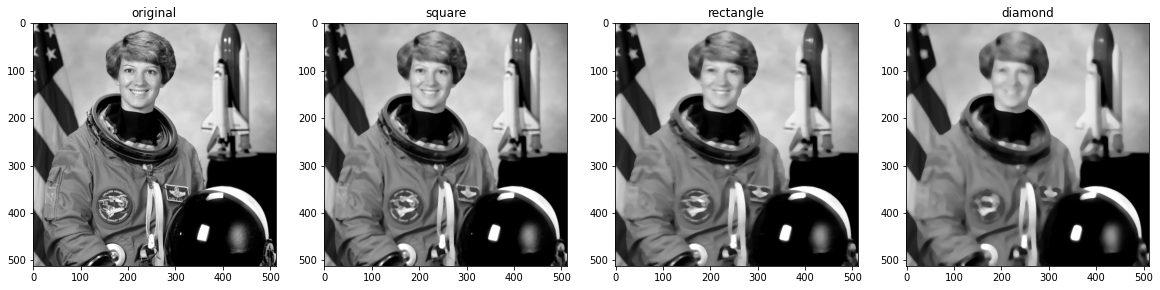

In [ ]:
# solution
square = morphology.square(5)
rectangle = morphology.rectangle(5,10)
diamond = morphology.diamond(7)

median_astronaut_square = median_filter(gray_astronaut,footprint=square)
median_astronaut_rectangle = median_filter(gray_astronaut,footprint=rectangle)
median_astronaut_diamond = median_filter(gray_astronaut,footprint=diamond)

fig, axs = plt.subplots(1,4, figsize=(20,5))
axs[0].imshow(gray_astronaut,cmap=plt.cm.gray)
axs[1].imshow(median_astronaut_square,cmap=plt.cm.gray)
axs[2].imshow(median_astronaut_rectangle,cmap=plt.cm.gray)
axs[3].imshow(median_astronaut_diamond,cmap=plt.cm.gray)


axs[0].set_title("original")
axs[1].set_title("square")
axs[2].set_title("rectangle")
axs[3].set_title("diamond")

plt.show()


*   What is the effect of the structuring element on the median filter?


**Solution**
The median filter is going to blur the images differently depending on the shape of the structuring eleement, especially the edges. 

*   What is the difference between gaussian filter, mean filter and median filter?
*   Provide an example where each one would be used.


**Solution**

The gaussian filter uses the gaussian function to define the weights inside the kernel (mask). Theses weights are the ones used to compute the weighted average of the neighboring pixels of an image. It can be used to filter Gaussian noise or when down-sampling images.


The mean filter replaces each pixel with the mean of it's neighbouring pixels. It is a simple filter that is used to filter out noise. 


The median filter is a non-linear filter. It replaces each pixel by the median of its neighbouring pixels. An advantage of the median filter is that, unline other averaging filters, it removes noise without losing edge information. Compared to Gaussian, when the noise level is too high for the Gaussian filter, the median filter can handle it better. It is for example used to silter out pixels with extreme intensities (such as black or white). [3] 


### Exercise: Effect of noise

It is easy to add noise to an image using the random_noise function available in skimage.util

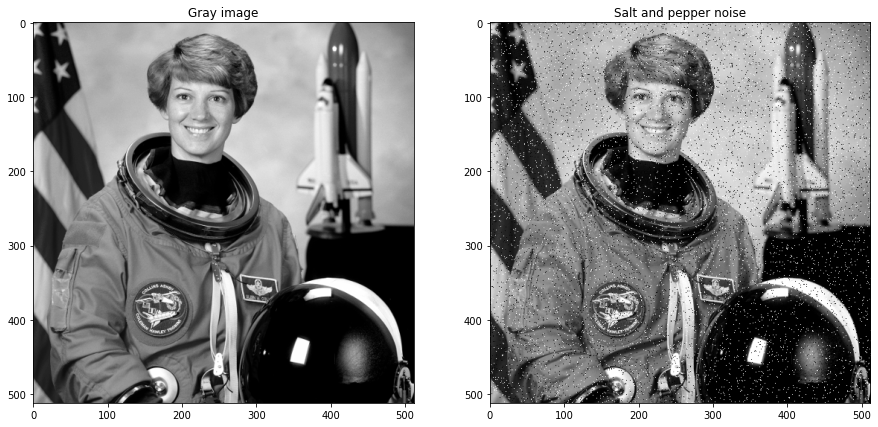

In [ ]:
from skimage.util import random_noise

image = data.astronaut()
image = color.rgb2gray(image)

img_noise = random_noise(image, mode='s&p')  # salt and pepper noise is added

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Gray image')
ax[1].imshow(img_noise, cmap='gray')
ax[1].set_title('Salt and pepper noise')

plt.show()

*   Create noisy images with **gaussian** noise and **salt and pepper** noise.
*   Apply mean filter, median filter and gaussian filter in each of the noisy images.
*   Visualize the images and observe the difference in each filter with respect to the noise.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


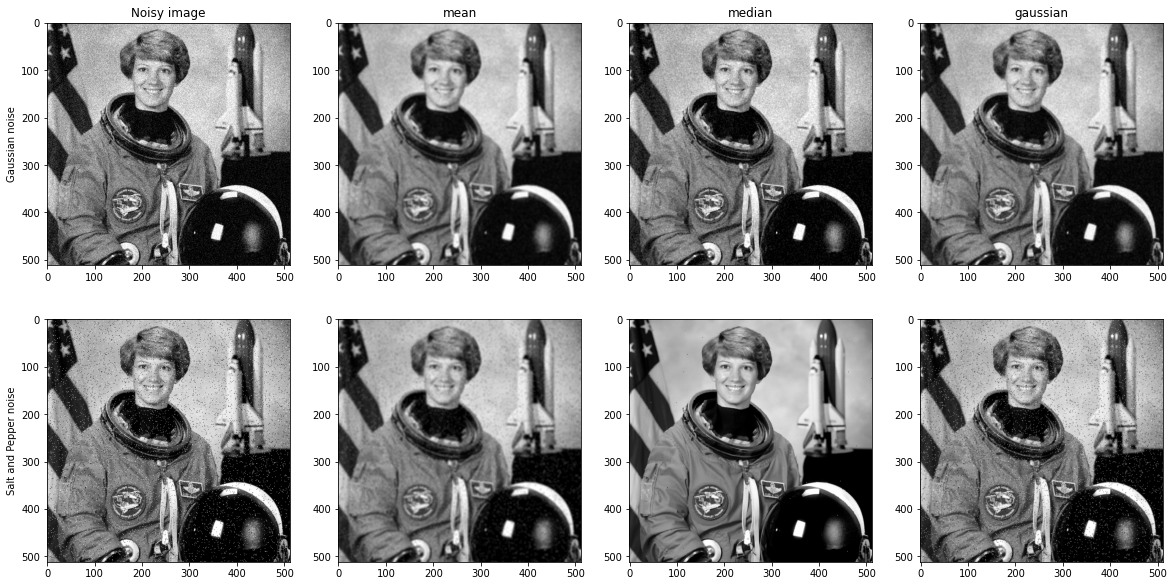

In [ ]:
from numpy.ma.extras import median
# solution
# taking mean filter = square with size 5, median filter = disk with radius 5, gaussian filter with sigma = 1 and 0.5 
from skimage.filters import rank

gaussianNoise_astronaut = random_noise(gray_astronaut, mode='gaussian') # gaussian noise
SnP_astronaut = random_noise(gray_astronaut, mode='s&p')  # salt and pepper noise is added

# Noisy gaussian astronaut
mean_gaussianNoise_astronaut = rank.mean(gaussianNoise_astronaut,selem=square)
median_gaussianNoise_astronaut = median_filter(gaussianNoise_astronaut,footprint=r1)
gaussian_gaussianNoise_astronaut = gaussian(gaussianNoise_astronaut,sigma=1)

# Noisy Salt and pepper astronaut
mean_SnP_astronaut = rank.mean(SnP_astronaut,selem=square)
median_SnP_astronaut = median_filter(SnP_astronaut,footprint=r1)
gaussian_SnP_astronaut = gaussian(SnP_astronaut,sigma=0.5)

fig, axs = plt.subplots(2,4, figsize=(20,10))
# the gaussian noise
axs[0,0].imshow(gaussianNoise_astronaut,cmap=plt.cm.gray)
axs[0,1].imshow(mean_gaussianNoise_astronaut,cmap=plt.cm.gray)
axs[0,2].imshow(median_gaussianNoise_astronaut,cmap=plt.cm.gray)
axs[0,3].imshow(gaussian_gaussianNoise_astronaut,cmap=plt.cm.gray)

# the salt and pepper 
axs[1,0].imshow(SnP_astronaut,cmap=plt.cm.gray)
axs[1,1].imshow(mean_SnP_astronaut,cmap=plt.cm.gray)
axs[1,2].imshow(median_SnP_astronaut,cmap=plt.cm.gray)
axs[1,3].imshow(gaussian_SnP_astronaut,cmap=plt.cm.gray)

axs[0,0].set_title("Noisy image")
axs[0,1].set_title("mean")
axs[0,2].set_title("median")
axs[0,3].set_title("gaussian")
axs[0,0].set_ylabel('Gaussian noise')
axs[1,0].set_ylabel('Salt and Pepper noise')

plt.show()


*   Which filter works better for gaussian noise and which filter works better for salt and pepper noise? Explain your choice of the filter for that particular type of noise.


**Solution**

Gaussian filter works better for gaussian noise. Median filter works better for Salt and Pepper. This is because the median filter can filter out more extreme intensites such as white or black. 

# Image Sharpening

A sharpening filter can be broken down into two steps: It takes a smoothed image, subtracts it from the original image to obtain the "details" of the image, and adds the "details" to the original image.

enhanced image = original + amount * (original - blurred)

### Exercise:
*   Read 'moon' image from the data module
*   Perform smoothing using a gaussian filter of sigma 1
*   Subtract the smoothened image from the original image.
*   Enhance the image with amount=1
*   Visualize each of the steps using matplotlib

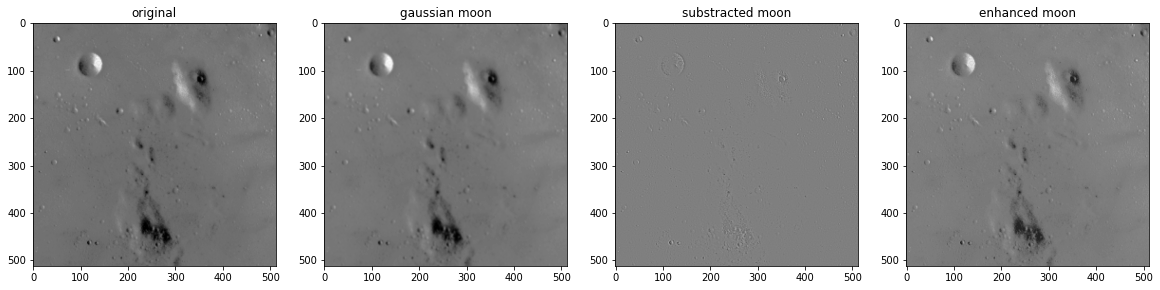

In [ ]:
# solution
moon = data.moon()
gaussian_moon = gaussian(moon,sigma=1)*255
#sub_moon = np.clip((moon - gaussian_moon),0,255)
sub_moon = moon - gaussian_moon
enhanced_moon = moon + sub_moon

fig, axs = plt.subplots(1,4, figsize=(20,5))
axs[0].imshow(moon,cmap=plt.cm.gray)
axs[1].imshow(gaussian_moon,cmap=plt.cm.gray)
axs[2].imshow(sub_moon,cmap=plt.cm.gray)
axs[3].imshow(enhanced_moon,cmap=plt.cm.gray)


axs[0].set_title("original")
axs[1].set_title("gaussian moon")
axs[2].set_title("substracted moon")
axs[3].set_title("enhanced moon")

plt.show()

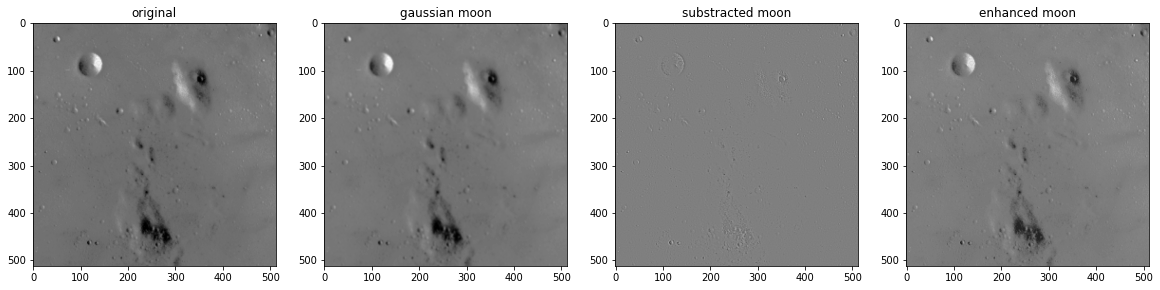

In [ ]:
from skimage.filters import gaussian
moon = data.moon()
gaussian_moon = gaussian(moon,sigma=1)*255
#sub_moon = np.clip((moon - gaussian_moon),0,255)
sub_moon = moon - gaussian_moon
enhanced_moon = moon + sub_moon

fig, axs = plt.subplots(1,4, figsize=(20,5))
axs[0].imshow(moon,cmap=plt.cm.gray)
axs[1].imshow(gaussian_moon,cmap=plt.cm.gray)
axs[2].imshow(sub_moon,cmap=plt.cm.gray)
axs[3].imshow(enhanced_moon,cmap=plt.cm.gray)


axs[0].set_title("original")
axs[1].set_title("gaussian moon")
axs[2].set_title("substracted moon")
axs[3].set_title("enhanced moon")

plt.show()

*   Keeping amount=1, change the value of sigma=5,10 and repeat the enhancements
*   Using the best sigma value, vary the amount value=0.5,2,5,10
*   Visualize the sharpened images using matplotlib

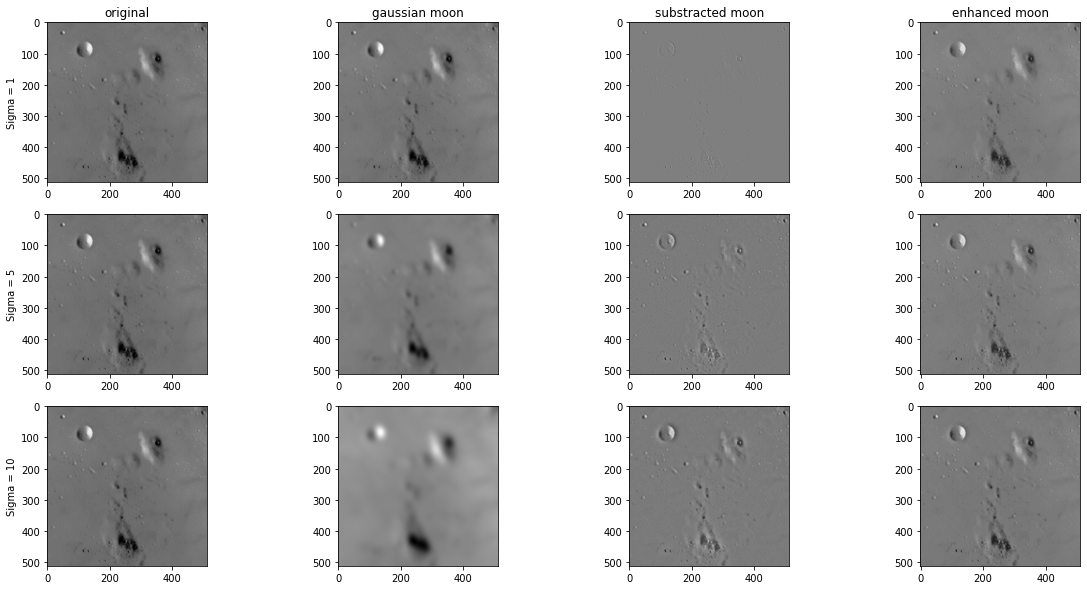

In [ ]:
# solution 
# sigma = 5
five_gaussian_moon = gaussian(moon,sigma=5)*255
five_sub_moon = moon - five_gaussian_moon
five_enhanced_moon = moon + five_sub_moon

# sigma = 10
ten_gaussian_moon = gaussian(moon,sigma=10)*255
ten_sub_moon = moon - ten_gaussian_moon
ten_enhanced_moon = moon + ten_sub_moon


fig, axs = plt.subplots(3,4, figsize=(20,10))
axs[0,0].imshow(moon,cmap=plt.cm.gray)
axs[0,1].imshow(gaussian_moon,cmap=plt.cm.gray)
axs[0,2].imshow(sub_moon,cmap=plt.cm.gray)
axs[0,3].imshow(enhanced_moon,cmap=plt.cm.gray)

axs[1,0].imshow(moon,cmap=plt.cm.gray)
axs[1,1].imshow(five_gaussian_moon,cmap=plt.cm.gray)
axs[1,2].imshow(five_sub_moon,cmap=plt.cm.gray)
axs[1,3].imshow(five_enhanced_moon,cmap=plt.cm.gray)

axs[2,0].imshow(moon,cmap=plt.cm.gray)
axs[2,1].imshow(ten_gaussian_moon,cmap=plt.cm.gray)
axs[2,2].imshow(ten_sub_moon,cmap=plt.cm.gray)
axs[2,3].imshow(ten_enhanced_moon,cmap=plt.cm.gray)


axs[0,0].set_title("original")
axs[0,1].set_title("gaussian moon")
axs[0,2].set_title("substracted moon")
axs[0,3].set_title("enhanced moon")
axs[0,0].set_ylabel('Sigma = 1')
axs[1,0].set_ylabel('Sigma = 5')
axs[2,0].set_ylabel('Sigma = 10')


plt.show()

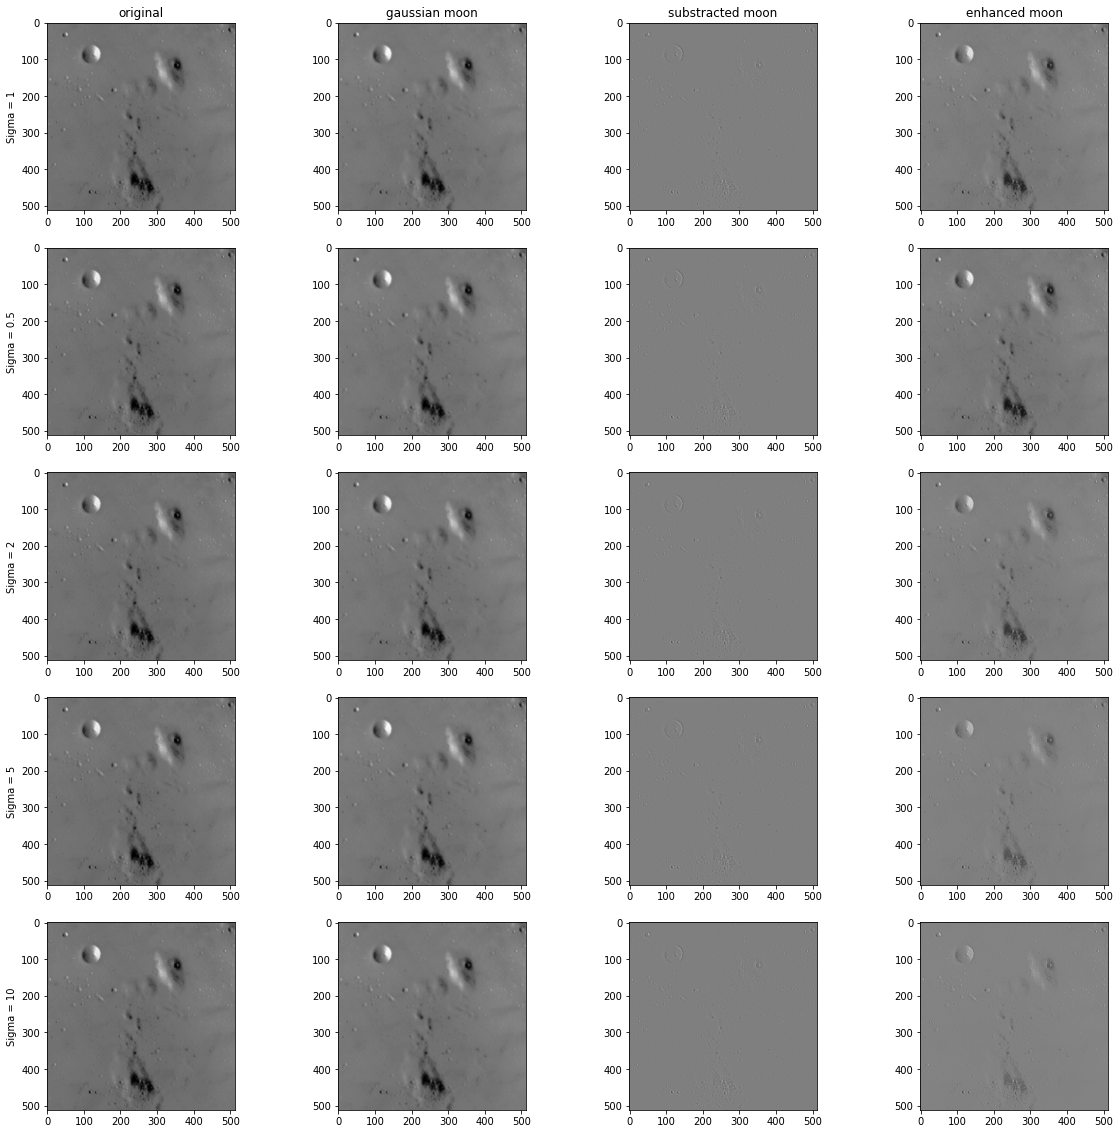

In [ ]:
# with sigma = 1 amount value=0.5,2,5,10
moon = data.moon()
gaussian_moon = gaussian(moon,sigma=1)*255
sub_moon = moon - gaussian_moon

half_sub_moon = 0.5*sub_moon
two_sub_moon = 2*sub_moon
five_sub_moon = 5*sub_moon
ten_sub_moon = 10*sub_moon

enhanced_moon = moon + sub_moon
half_amount_enhanced_moon = moon + half_sub_moon
two_amount_enhanced_moon = moon + two_sub_moon
five_amount_enhanced_moon = moon + five_sub_moon
ten_amount_enhanced_moon = moon + ten_sub_moon

fig, axs = plt.subplots(5,4, figsize=(20,20))
axs[0,0].imshow(moon,cmap=plt.cm.gray)
axs[0,1].imshow(gaussian_moon,cmap=plt.cm.gray)
axs[0,2].imshow(sub_moon,cmap=plt.cm.gray)
axs[0,3].imshow(enhanced_moon,cmap=plt.cm.gray)

axs[1,0].imshow(moon,cmap=plt.cm.gray)
axs[1,1].imshow(gaussian_moon,cmap=plt.cm.gray)
axs[1,2].imshow(half_sub_moon,cmap=plt.cm.gray)
axs[1,3].imshow(half_amount_enhanced_moon,cmap=plt.cm.gray)

axs[2,0].imshow(moon,cmap=plt.cm.gray)
axs[2,1].imshow(gaussian_moon,cmap=plt.cm.gray)
axs[2,2].imshow(two_sub_moon,cmap=plt.cm.gray)
axs[2,3].imshow(two_amount_enhanced_moon,cmap=plt.cm.gray)

axs[3,0].imshow(moon,cmap=plt.cm.gray)
axs[3,1].imshow(gaussian_moon,cmap=plt.cm.gray)
axs[3,2].imshow(five_sub_moon,cmap=plt.cm.gray)
axs[3,3].imshow(five_amount_enhanced_moon,cmap=plt.cm.gray)

axs[4,0].imshow(moon,cmap=plt.cm.gray)
axs[4,1].imshow(gaussian_moon,cmap=plt.cm.gray)
axs[4,2].imshow(ten_sub_moon,cmap=plt.cm.gray)
axs[4,3].imshow(ten_amount_enhanced_moon,cmap=plt.cm.gray)


axs[0,0].set_title("original")
axs[0,1].set_title("gaussian moon")
axs[0,2].set_title("substracted moon")
axs[0,3].set_title("enhanced moon")
axs[0,0].set_ylabel('Sigma = 1')
axs[1,0].set_ylabel('Sigma = 0.5')
axs[2,0].set_ylabel('Sigma = 2')
axs[3,0].set_ylabel('Sigma = 5')
axs[4,0].set_ylabel('Sigma = 10')

plt.show()

# Edge Detection

### Exercise:
*   Read 'camera' image from the data module
*   Perform sobel, prewitt and roberts edge detection on the image
*   Visualize the original image, the edges and the edges superimposed on the original image

In [ ]:
camera = rgb2gray(camera)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


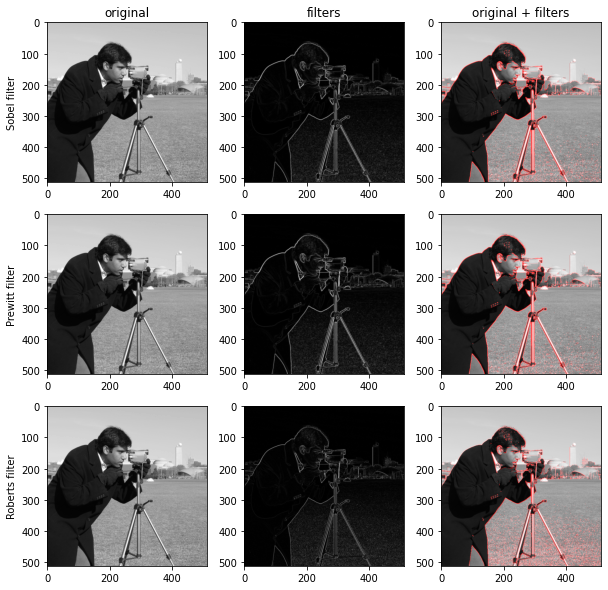

In [ ]:
# solution

threshold = 0.1

sobel_edges = filters.sobel(camera)
prewitt_edges = filters.prewitt(camera)
roberts_edges = filters.roberts(camera)



fig, axs = plt.subplots(3,3, figsize=(10,10))

axs[0,0].imshow(camera,cmap=plt.cm.gray)
axs[1,0].imshow(camera,cmap=plt.cm.gray)
axs[2,0].imshow(camera,cmap=plt.cm.gray)

axs[0,1].imshow(sobel_edges,cmap=plt.cm.gray)
axs[1,1].imshow(prewitt_edges,cmap=plt.cm.gray)
axs[2,1].imshow(roberts_edges,cmap=plt.cm.gray)



camera_size = camera.shape

camera_and_filter_sobel = np.zeros((camera_size[0],camera_size[1],3),dtype=int)
camera_and_filter_prewitt = np.zeros((camera_size[0],camera_size[1],3),dtype=int)
camera_and_filter_roberts = np.zeros((camera_size[0],camera_size[1],3),dtype=int)

camera_and_filter_sobel[:,:,0] = camera
camera_and_filter_sobel[:,:,1] = camera
camera_and_filter_sobel[:,:,2] = camera

camera_and_filter_prewitt[:,:,0] = camera
camera_and_filter_prewitt[:,:,1] = camera
camera_and_filter_prewitt[:,:,2] = camera

camera_and_filter_roberts[:,:,0] = camera
camera_and_filter_roberts[:,:,1] = camera
camera_and_filter_roberts[:,:,2] = camera


for idx,pixel in np.ndenumerate(sobel_edges): 
  if pixel > threshold:   
    camera_and_filter_sobel[idx[0],idx[1],0] = 255

for idx,pixel in np.ndenumerate(prewitt_edges): 
  if pixel > threshold:   
    camera_and_filter_prewitt[idx[0],idx[1],0] = 255

for idx,pixel in np.ndenumerate(roberts_edges): 
  if pixel > threshold:   
    camera_and_filter_roberts[idx[0],idx[1],0] = 255


axs[0,2].imshow(camera_and_filter_sobel)
axs[1,2].imshow(camera_and_filter_prewitt)
axs[2,2].imshow(camera_and_filter_roberts)



axs[0,0].set_title("original")
axs[0,1].set_title("filters")
axs[0,2].set_title("original + filters")

axs[0,0].set_ylabel('Sobel filter')
axs[1,0].set_ylabel('Prewitt filter')
axs[2,0].set_ylabel('Roberts filter')


plt.show()



*   What is the difference between each of the edge detectors?
*   What does you think is the limitation of each of the detector?



**Solution**

The Prewitt filter detects horizontal and vertical edges (along x and y axes)

The Sobel filter has the advantage of differentiating and smoothing at the same time. 

Burnham et al. found that Roberts filter is fast but generally finds edges only at 0 and 90 degrees. The Sobel filter could find edges at 0 and 90, also 45 and 135 but the execution was slower [4]. 

The edge detectors give a good approximation of the edges present in the image but the width of the edges are inconsistant, some are thick others are thin. Moreover, because the gradient intensity level is between 0 and 255, the edges detected by the edge detection operators will be of varying intensities.



### Exercise: Canny edge detector
*   Read 'camera' image from the data module
*   Apply canny operator with default parameters
*   Apply canny by varying sigma=1, 3, 5, 10
*   Visualize the original image along with the edges detected using matplotlib.

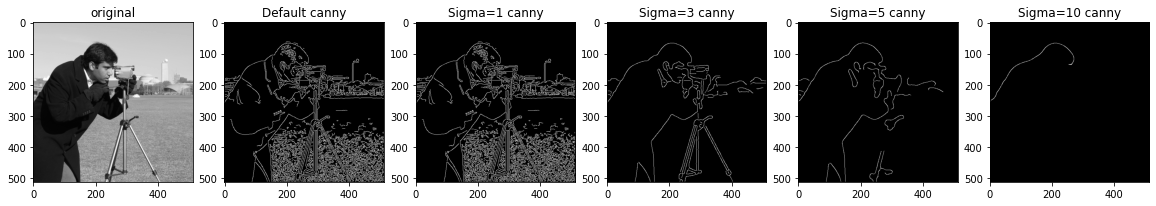

In [ ]:
# solution
from skimage import feature
canny_camera = feature.canny(camera)
one_canny_camera = feature.canny(camera,sigma=1)
three_canny_camera = feature.canny(camera,sigma=3)
five_canny_camera = feature.canny(camera,sigma=5)
ten_canny_camera = feature.canny(camera,sigma=10)

fig, axs = plt.subplots(1,6, figsize=(20,5))
axs[0].imshow(camera,cmap=plt.cm.gray)
axs[1].imshow(canny_camera,cmap=plt.cm.gray)
axs[2].imshow(one_canny_camera,cmap=plt.cm.gray)
axs[3].imshow(three_canny_camera,cmap=plt.cm.gray)
axs[4].imshow(five_canny_camera,cmap=plt.cm.gray)
axs[5].imshow(ten_canny_camera,cmap=plt.cm.gray)

axs[0].set_title("original")
axs[1].set_title("Default canny")
axs[2].set_title("Sigma=1 canny")
axs[3].set_title("Sigma=3 canny")
axs[4].set_title("Sigma=5 canny")
axs[5].set_title("Sigma=10 canny")

plt.show()

*   What is the effect of varying the sigma values on the edges?
*   What do the high threshold and low threshold parameters denote?


**Solution**

Sigma corresponds to the standard deviation of the Gaussian filter applied during Canny Edge Detection. Therefore, increasing the sigma will increase the noise reduction (the image will become more blurry) making it more and more difficult to distinguish the edges. Consequently, the greater the sigma, the less edges are detected.

High threshold: Upper bound for hysteresis thresholding (linking edges).

Low threshold: Lower bound for hysteresis thresholding (linking edges).

The high and low thresholds are used to identify the pixels that have high intensities (high threshold), the pixels that are non relevant (low threshold), and the pixels that are weak (in between high and low thresholds). (Please refer to the next question for more explanation)

*   What is the algorithm behind the Canny operator?


**Solution**

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images [5,6]

The algorithm is composed of 5 steps:
1.   Noise reduction;
2.   Gradient calculation;
3.   Non-maximum suppression;
4.   Double threshold;
5.   Edge Tracking by Hysteresis.


1.   Noise reduction

Noise reduction is obtained using Gaussian filter. This is done as edge detection is sentitive to image noise. 

2.   Gradient calculation

Then the algorithm performs edge detection by identifying the changes in pixels' intensity. Edge detection operators such as Roberts, Prewitt or Sobel can be used [5]


3.   Non-maximum suppression

While edge detection gives a good approximation of the edges present in the image but the width of the edges are inconsistant, some are thick others are thin. Moreover, because the gradient intensity level is between 0 and 255, the edges detected by the edge detection operators will be of varying intensities. 

Non-maximum suppresion takes care of these two problems: it uniforms the width (thins them out) and the intensity of the edges. 

For this, it goes through the locations with the sharpest change of intensity value. Then it compares the edge strength of the current pixel with the edge strength of the pixel in the positive and negative gradient directions. If any of the pixels on the same direction (if moving in y-direction it would be above and below, if moving in x-direction it would be left and right pixels) are more intense than the current pixel, then the current pixel is set to 0, if not, it is kept. 

4.   Double threshold

After Non-maximum suppression (or Gradient magnitude thresholding), the remaining edge pixels are more accurate to the real edges of the image, but there are still some remaining noise and colour variation. 

By applying a double threshold (a max and a min threshold value), we can preserve the edge pixels with a high gradient value and filter out the edge pixels with a low gradient value. The Double threshold will identify the pixels with high intensity (marked as strong pixels) using max threshold. The pixels that are not relevant using low threshold. The pixels that are in between max and min (considered weak pixels).

5.   Edge Tracking by Hysteresis

The weak pixels mentioned in 4. (pixels in between max and min thresholds) can either be from a true edge or from the noise/colour variations. The Hysteresis will remove the weak pixels that are caused by noise/colour variations.As weak edges from true edges are usually connected to a strong edge pixel. It will transform the weak pixels into strong ones, if and only if one of its surrounding pixels is strong. [6] 










[1] Datacarpentry.org. 2022. Blurring Images – Image Processing with Python. [online] Available at: <https://datacarpentry.org/image-processing/06-blurring/> [Accessed 13 October 2022].

[2] Pages.stat.wisc.edu. 2022. [online] Available at: <https://pages.stat.wisc.edu/~mchung/teaching/MIA/reading/diffusion.gaussian.kernel.pdf.pdf> [Accessed 13 October 2022].

[3]Pages.stat.wisc.edu. 2022. [online] Available at: <https://pages.stat.wisc.edu/~mchung/teaching/MIA/reading/diffusion.gaussian.kernel.pdf.pdf> [Accessed 13 October 2022].

[4] Burnham, J., Hardy, J. and Meadors, K., 1997. Comparison of the Roberts, Sobel, Robinson, Canny, and Hough Image Detection Algorithms. MS State DSP COnference, [online] Available at: <https://isip.piconepress.com/courses/msstate/ece_4773/projects/1997/group_image/paper/paper1.pdf> [Accessed 13 October 2022].

[5] Sahir, S., 2022. Canny Edge Detection Step by Step in Python — Computer Vision. [online] Medium. Available at: <https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123> [Accessed 13 October 2022].

[6] Canny J. A computational approach to edge detection. IEEE Trans Pattern Anal Mach Intell. 1986 Jun;8(6):679-98. PMID: 21869365.


---

## **End of P3: Filters and Edges**
Deadline for P3 submission in CampusVirtual is: **Thursday, the 13th of October, 2022**
